In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker
%matplotlib inline

# Covid-19 Data manipulation
## Fetching cases from Brasil.io

In [2]:
cases = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
cases

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-02,AC,Acrelândia,city,8,0.0,True,15256.0,1200013.0,52.43838,NaN
1,2020-04-02,AC,Porto Acre,city,1,0.0,True,18504.0,1200807.0,5.40424,NaN
2,2020-04-02,AC,Rio Branco,city,36,0.0,True,407319.0,1200401.0,8.83828,NaN
3,2020-04-02,AC,NaN,state,45,0.0,True,881935.0,12.0,5.10242,NaN
4,2020-04-02,AL,Importados/Indefinidos,city,4,0.0,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4539,2020-02-28,SP,NaN,state,2,NaN,False,45919049.0,35.0,0.00436,NaN
4540,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
4541,2020-02-27,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN
4542,2020-02-26,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN


## Fetching from the Johns Hopkins dashboard
Jonhs Hopkins dashboard data is stored on [Github](https://github.com/CSSEGISandData/COVID-19). There are daily reports and timeseries.

In [3]:
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Loading the map of Brasil at municipality level 

In [5]:
mapa = gpd.read_file('../mapas/muni_br.gpkg')

## Adding latest confirmed case count to the map

In [6]:
mapa['casos']=0
for i, row in mapa.iterrows():
    if row.code_muni in list(cases.city_ibge_code):
        mapa.loc[mapa.code_muni==row.code_muni, 'casos'] += cases[(cases.city_ibge_code==row.code_muni)&(cases.is_last)].confirmed.iloc[0]

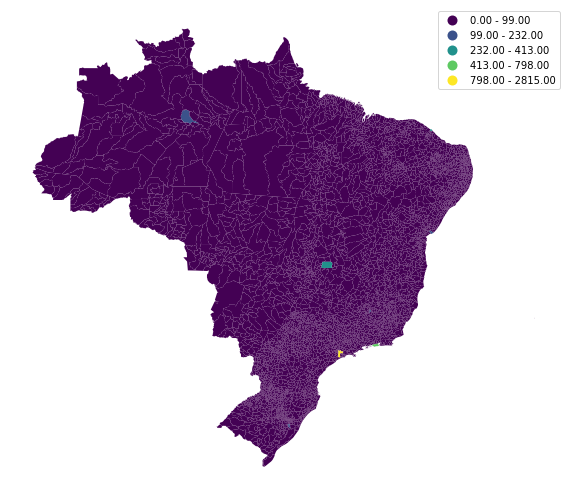

In [7]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
mapa.plot(column='casos', ax=ax, legend=True, scheme='NaturalBreaks');
ax.set_axis_off()